In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(14999, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [5]:
df["category"].value_counts()

category
D    7558
G    2498
E    1614
B     988
F     899
C     615
H     462
A     365
Name: count, dtype: int64

## Mapping categories to numeric values

In [6]:
# This is just for trying purpose we might not need this as this label encoding is best suited for ordinal data but categories here are nominal and have no order

# Define the mapping from categories to numeric values
category_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8
}

# Map the categories to numeric values
df['category_numeric'] = df['category'].map(category_mapping)

# we can also use replace(), df["category"].replace(category_mapping)



In [7]:
df

,vidid,adview,views,likes,dislikes,comment,published,duration,category,category_numeric
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D,4
...,...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G,7


## Removing unnecessary "F" present in data

In [8]:
df = df[df.views != "F"]
df = df[df.likes != "F"]
df = df[df.dislikes != "F"]
df = df[df.comment != "F"]

In [9]:
df.reset_index(drop=True, inplace= True)
df.shape

(14637, 10)

In [10]:
df

,vidid,adview,views,likes,dislikes,comment,published,duration,category,category_numeric
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D,4
...,...,...,...,...,...,...,...,...,...,...
14632,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A,1
14633,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D,4
14634,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B,2
14635,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G,7


## Convert data types to integer

In [11]:
df.dtypes

vidid               object
adview               int64
views               object
likes               object
dislikes            object
comment             object
published           object
duration            object
category            object
category_numeric     int64
dtype: object

In [12]:
df["views"] = df["views"].astype(int)
df["comment"] = df["comment"].astype(int)
df["likes"] = df["likes"].astype(int)
df["dislikes"] = df["dislikes"].astype(int)
df["adview"] = df["adview"].astype(int)


In [13]:
df.dtypes

vidid               object
adview               int32
views                int32
likes                int32
dislikes             int32
comment              int32
published           object
duration            object
category            object
category_numeric     int64
dtype: object

## Encoding published, duration, vidid

In [14]:
"""

# This step is also not needed as we are not going to use this features for model training
# Encoding these features doesn't add any value in prediction

from sklearn.preprocessing import LabelEncoder

df["duration_encoded"] = LabelEncoder().fit_transform(df["duration"])
df["published_encoded"] = LabelEncoder().fit_transform(df["published"])
df["vidid_encoded"] = LabelEncoder().fit_transform(df["vidid"])

"""

'\n\n# This step is also not needed as we are not going to use this features for model training\n# Encoding these features doesn\'t add any value in prediction\n\nfrom sklearn.preprocessing import LabelEncoder\n\ndf["duration_encoded"] = LabelEncoder().fit_transform(df["duration"])\ndf["published_encoded"] = LabelEncoder().fit_transform(df["published"])\ndf["vidid_encoded"] = LabelEncoder().fit_transform(df["vidid"])\n\n'

## Converting duration into time format (hh:mm:ss)

In [15]:
import datetime
import time

In [16]:
def change_to_time_format(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''

    P = ['H', 'M', 'S']

    for i in y:
        if i not in P:
            mm = mm + i
        else:
            if(i == 'H'):
                h = mm
                mm = ''
            elif(i == 'M'):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''


    if(h == ''):
        h = '00'
    
    if(m == ''):
        m = '00'

    if(s == ''):
        s = '00'

    digital_time = h + ':' + m + ':' + s

    return digital_time
    



In [17]:
time = df["duration"].apply(change_to_time_format)

In [18]:
time

0         00:7:37
1         00:9:30
2         00:2:16
3         00:4:22
4        00:00:31
           ...   
14632     00:6:10
14633     00:3:56
14634     00:3:13
14635    00:00:26
14636      00:1:1
Name: duration, Length: 14637, dtype: object

## Using time format to calculate duration

In [19]:
def conv_in_sec(time_string):
    
    h,m,s = time_string.split(':')

    return int(h) * 3600 + int(m) * 60 + int(s)


In [20]:
time1 = time.apply(conv_in_sec)

In [21]:
df["duration_sec"] = time1

In [22]:
df

,vidid,adview,views,likes,dislikes,comment,published,duration,category,category_numeric,duration_sec
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F,6,457
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D,4,570
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C,3,136
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H,8,262
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D,4,31
...,...,...,...,...,...,...,...,...,...,...,...
14632,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A,1,370
14633,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D,4,236
14634,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B,2,193
14635,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G,7,26


## Visualization

<Axes: xlabel='category'>

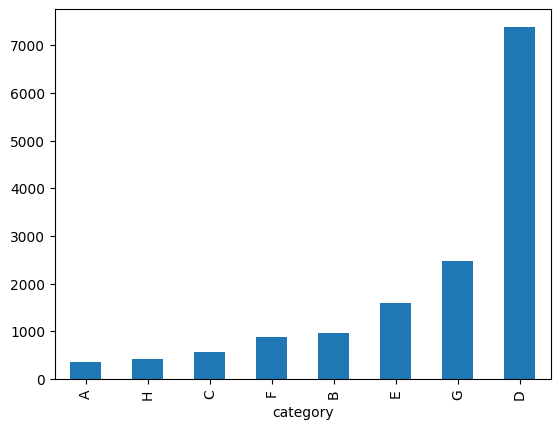

In [23]:
df["category"].value_counts().sort_values().plot(kind="bar")

<Axes: xlabel='category'>

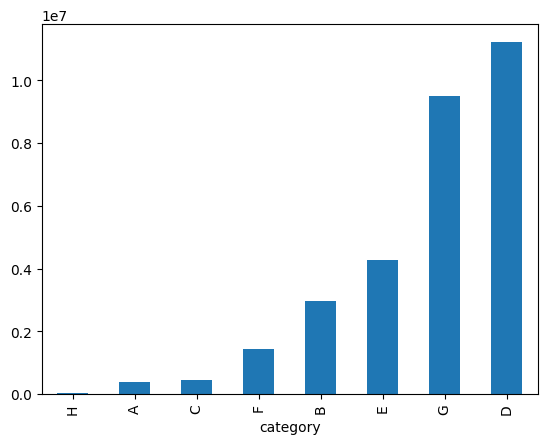

In [24]:
df.groupby('category')['adview'].sum().sort_values().plot(kind='bar')

## Outliers

<Axes: >

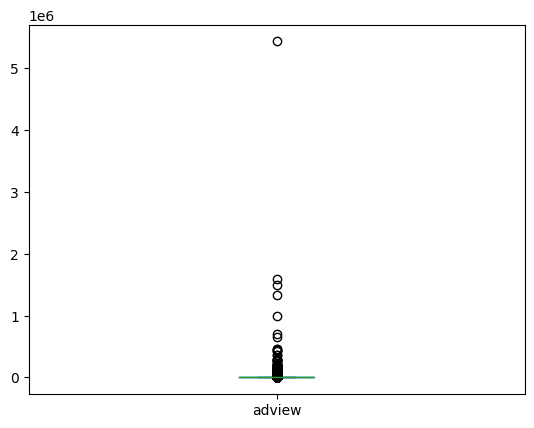

In [25]:
df['adview'].plot(kind='box')

In [26]:
df[df['views']> 70000000] #.plot(kind= 'box')

,vidid,adview,views,likes,dislikes,comment,published,duration,category,category_numeric,duration_sec
2925,VID_22372,58,138047869,283824,15626,32271,2016-10-18,PT4M33S,G,7,273
7396,VID_22507,226,79187040,258611,20335,8789,2016-01-19,PT4M22S,G,7,262
7488,VID_21755,225,87934318,122141,8575,7292,2016-03-19,PT4M48S,G,7,288


<Axes: >

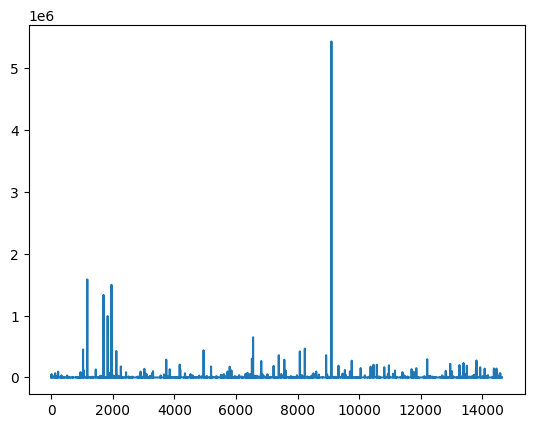

In [27]:
df['adview'].plot()

In [28]:
df[df['likes'] > 200000] #.plot(kind = 'box')

,vidid,adview,views,likes,dislikes,comment,published,duration,category,category_numeric,duration_sec
2925,VID_22372,58,138047869,283824,15626,32271,2016-10-18,PT4M33S,G,7,273
7396,VID_22507,226,79187040,258611,20335,8789,2016-01-19,PT4M22S,G,7,262
14011,VID_22441,30,40165992,216083,7935,15028,2017-01-16,PT4M8S,G,7,248


In [29]:
df[df['dislikes'] > 30000]

,vidid,adview,views,likes,dislikes,comment,published,duration,category,category_numeric,duration_sec
4628,VID_19663,30,27472475,140661,49449,28877,2014-10-23,PT3M50S,G,7,230
7881,VID_14966,33,46375164,69027,32509,7304,2016-12-19,PT1H42M38S,D,4,6158
8084,VID_14344,39,60013005,159808,35340,36336,2009-06-01,PT4M38S,D,4,278
9641,VID_20806,3102,14132073,22040,30235,23738,2009-08-29,PT3M19S,G,7,199


In [30]:
df[df['comment'] > 40000]

,vidid,adview,views,likes,dislikes,comment,published,duration,category,category_numeric,duration_sec
12824,VID_23020,39,10607744,121157,3973,75045,2016-06-03,PT4M15S,G,7,255


In [31]:
df[df["adview"] > 500000]

,vidid,adview,views,likes,dislikes,comment,published,duration,category,category_numeric,duration_sec
1171,VID_22676,704516,919357,2294,396,299,2016-06-09,PT3M50S,G,7,230
1173,VID_17354,1583846,17070057,98594,4234,7276,2016-06-30,PT3M9S,E,5,189
1701,VID_11979,1333626,1344097,60,7,4,2016-12-27,PT58S,D,4,58
1835,VID_1592,991819,4354099,16640,1931,2101,2017-02-06,PT5M10S,B,2,310
1958,VID_11980,1497349,1525185,414,114,19,2016-12-27,PT1M9S,D,4,69
6554,VID_11034,648908,3786164,15656,785,2159,2016-09-13,PT5M53S,D,4,353
9097,VID_22355,5429665,7072849,28360,4333,1872,2017-04-08,PT4M19S,G,7,259


<Axes: >

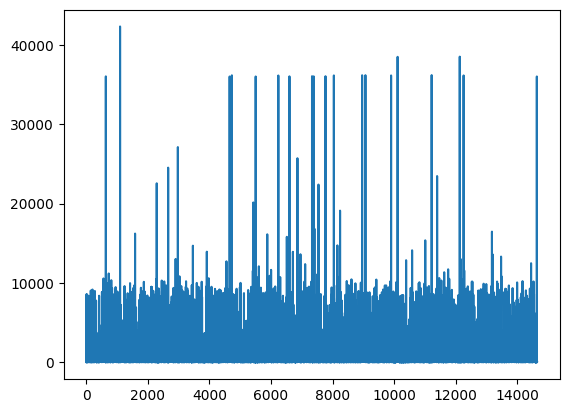

In [32]:
df['duration_sec'].plot()

In [33]:
df.drop(index= [9097, 1171, 1173, 1701, 1835, 6554, 1958, 2925, 7396, 7488, 14010, 4628, 7881, 8084, 9640, 12823], inplace = True)

In [34]:
df.reset_index(drop=True, inplace=True)

## Correlation

<Axes: >

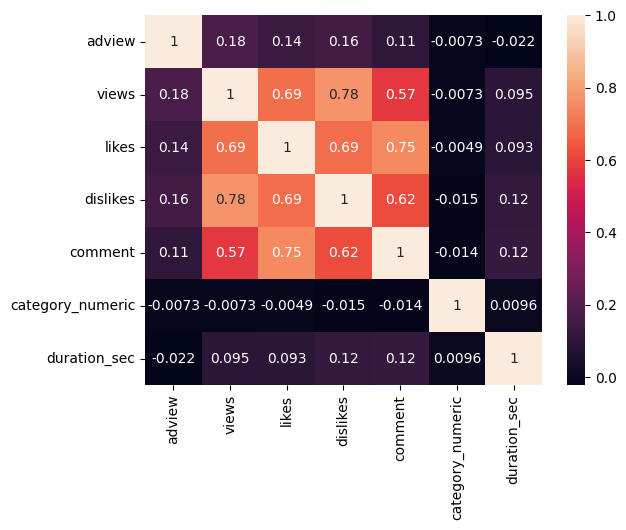

In [35]:
sns.heatmap(df.corr(method='kendall',numeric_only=True), annot=True)

## One-hot encoded category column

In [36]:
df_encoded = pd.get_dummies(df, columns=['category'], dtype=int)

In [37]:
df_encoded

,vidid,adview,views,likes,dislikes,comment,published,duration,category_numeric,duration_sec,category_A,category_B,category_C,category_D,category_E,category_F,category_G,category_H
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6,457,0,0,0,0,0,1,0,0
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4,570,0,0,0,1,0,0,0,0
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3,136,0,0,1,0,0,0,0,0
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8,262,0,0,0,0,0,0,0,1
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4,31,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14616,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1,370,1,0,0,0,0,0,0,0
14617,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4,236,0,0,0,1,0,0,0,0
14618,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2,193,0,1,0,0,0,0,0,0
14619,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7,26,0,0,0,0,0,0,1,0


In [38]:
df_encoded.isna().sum()

vidid               0
adview              0
views               0
likes               0
dislikes            0
comment             0
published           0
duration            0
category_numeric    0
duration_sec        0
category_A          0
category_B          0
category_C          0
category_D          0
category_E          0
category_F          0
category_G          0
category_H          0
dtype: int64

## Machine Leaning Models

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_encoded[['views', 'likes', 'dislikes', 'comment', 'duration_sec']] = scaler.fit_transform(df_encoded[['views', 'likes', 'dislikes', 'comment', 'duration_sec']])

df_encoded.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category_numeric,duration_sec,category_A,category_B,category_C,category_D,category_E,category_F,category_G,category_H
0,VID_18655,40,0.015336,0.039443,0.012006,0.014591,2016-09-14,PT7M37S,6,0.010799,0,0,0,0,0,1,0,0
1,VID_14135,2,0.000025,0.000259,0.000066,0.000080,2016-10-01,PT9M30S,4,0.013470,0,0,0,1,0,0,0,0
2,VID_2187,1,0.000029,0.000116,0.000000,0.000027,2016-07-02,PT2M16S,3,0.003214,0,0,1,0,0,0,0,0
3,VID_23096,6,0.009229,0.003596,0.005325,0.002039,2016-07-27,PT4M22S,8,0.006191,0,0,0,0,0,0,0,1
4,VID_10175,1,0.000009,0.000005,0.000000,0.000000,2016-06-29,PT31S,4,0.000733,0,0,0,1,0,0,0,0


In [40]:
features = ['views', 'likes', 'dislikes', 'comment', 'duration_sec', 'category_A', 'category_B', 'category_C', 'category_D', 'category_E', 'category_F', 'category_G', 'category_H' ]

In [41]:
y = df_encoded['adview']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded[features], y, test_size = 0.2, random_state = 42)

In [43]:
df_encoded.describe()

,adview,views,likes,dislikes,comment,category_numeric,duration_sec,category_A,category_B,category_C,category_D,category_E,category_F,category_G,category_H
count,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000
mean,1234.533411,0.010100,0.012527,0.008031,0.005335,4.606525,0.024579,0.024485,0.066275,0.038027,0.504480,0.109158,0.060119,0.168662,0.028794
std,14260.800043,0.032508,0.037351,0.027466,0.019115,1.576098,0.054747,0.154556,0.248770,0.191269,0.499997,0.311848,0.237715,0.374465,0.167233
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000466,0.000407,0.000232,0.000093,4.000000,0.004419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.002354,0.002078,0.001257,0.000613,4.000000,0.007680,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,0.008644,0.008594,0.005490,0.002972,6.000000,0.017085,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,466253.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
from sklearn import metrics

def print_error(X_test, y_test, model_name):
    
    prediction = model_name.predict(X_test)

    print("MSE", metrics.mean_squared_error(y_true= y_test, y_pred= prediction))
    print("MAE", metrics.mean_absolute_error(y_true= y_test, y_pred= prediction))


In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print_error(X_test, y_test, lr)

MSE 265978430.97230768
MAE 2370.177094017094


In [46]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha= 0.1).fit(X_train, y_train)
print_error(X_test, y_test, ridge)

MSE 265979041.5848272
MAE 2367.02752125442


In [47]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1).fit(X_train, y_train)
print_error(X_test, y_test, lasso)

MSE 265988467.62628052
MAE 2366.510248354949


In [48]:
from sklearn. tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor().fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

MSE 383464014.17367524
MAE 2035.0017094017094


In [49]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

MSE 248716195.20965803
MAE 2096.7657316239315


## The SVM model is found best among all model

In [50]:
from sklearn.svm import SVR

svm = SVR().fit(X_train, y_train)
print_error(X_test, y_test, svm)

MSE 267597707.10571653
MAE 1235.2947852733262


## Artificial neural network

In [51]:
import keras

In [52]:
from keras.layers import Dense

ann = keras.models.Sequential([Dense(64, activation = 'relu', input_shape = X_train.shape[1:]),
                               Dense(32, activation = 'relu'),
                               Dense(1, activation='linear')])

optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])

history = ann.fit(X_train, y_train, epochs=100)


Epoch 1/100


c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - loss: 187427632.0000 - mean_squared_error: 187427632.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 214434992.0000 - mean_squared_error: 214434992.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 279398816.0000 - mean_squared_error: 279398816.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 209918880.0000 - mean_squared_error: 209918880.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 209647856.0000 - mean_squared_error: 209647856.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 183441760.0000 - mean_squared_error: 183441760.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 182029008.0000 - mean_squared_error: 182029008.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 205282624.0000 - mean_squared_error: 205282624.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 294433984.0000 - mean_squared

In [53]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

In [54]:
print_error(X_test, y_test, ann)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
MSE 265903761.2016765
MAE 2342.239337014174


In [55]:
import joblib
joblib.dump(svm, "svm_youtube_adview_pred.pkl")

['svm_youtube_adview_pred.pkl']

In [ ]:
## ann.save("ann-youtube-adview.h5") saving ann model